In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Randomization
import random

In [2]:
# Load and check data

dataframeA = pd.read_csv('Dataset Aggregation File/MeterA_aggregation.csv')
#display(dataframeA.head())
dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

featuresVector = dataframeA[['Flatness ratio','Symmetry','Crossflow','Average Flow Velocity','Average speed of sound','Average Gain']]

# yLbl is Class Attruibute labels

yLbl = dataframeA[['Class Attruibute']]

#featuresVector
dataframeA

,Flatness ratio,Symmetry,Crossflow,Average Flow Velocity,Average speed of sound,Average Gain,Class Attruibute
0,0.841499,1.009367,0.993816,9.350917,1485.391229,35.064189,1
1,0.842250,1.006584,0.996605,8.323063,1485.919896,34.975281,1
2,0.840723,1.011647,0.998152,7.273721,1485.903146,34.920553,1
3,0.841119,1.017807,0.996812,6.214215,1484.790938,34.878133,1
4,0.840358,1.016534,0.996221,6.209143,1484.252875,34.882507,1
...,...,...,...,...,...,...,...
78,0.792929,1.006295,0.999666,3.050531,1484.645292,34.725749,2
79,0.792309,1.004472,0.999873,3.053593,1484.581813,34.726258,2
80,0.793471,1.009560,1.001110,3.049676,1484.530583,34.729004,2
81,0.796730,1.010570,0.999029,3.053826,1484.473917,34.728801,2


In [3]:
dataframeA['Class Attruibute'].value_counts()

2    50
1    33
Name: Class Attruibute, dtype: int64

In [4]:
dataframeA.shape

(83, 7)

In [5]:
dataframeA['Class Attruibute'].value_counts()

2    50
1    33
Name: Class Attruibute, dtype: int64

In [6]:
# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(featuresVector) 
scaled_data1 = scaler.fit_transform(dataframeA)

#print(dataframeA)
print("------------------------------  scaled data  -----------------------------")
print(scaled_data)

#print("-----------------------------------------------------------")
#print(scaled_data[:6])

------------------------------  scaled data  -----------------------------
[[ 9.61066975e-01 -5.51762461e-01 -1.82472234e+00  2.29171609e+00
   8.20842688e-01  3.31664642e+00]
 [ 1.00279448e+00 -9.44065718e-01 -4.49788945e-01  1.74661658e+00
   1.62301423e+00  2.06783279e+00]
 [ 9.18002910e-01 -2.30339135e-01  3.12573796e-01  1.19012112e+00
   1.59759866e+00  1.29911838e+00]
 [ 9.39969374e-01  6.38158100e-01 -3.48063876e-01  6.28235507e-01
  -9.00073528e-02  7.03297428e-01]
 [ 8.97738692e-01  4.58710041e-01 -6.39313257e-01  6.25545419e-01
  -9.06435894e-01  7.64734199e-01]
 [ 8.16830518e-01  1.79974226e-01 -1.04194064e+00  6.23841442e-01
  -9.31314323e-01  7.34728356e-01]
 [ 9.63591056e-01 -4.25745441e-01 -9.43099823e-01  6.26479901e-01
  -4.74750534e-01  7.63306183e-01]
 [ 9.28727837e-01  2.58338819e-01 -8.02344488e-01  6.22044116e-01
  -2.12027886e-01  6.74719610e-01]
 [ 9.70711819e-01 -6.16911430e-01 -1.62938418e+00  6.30251185e-01
  -2.62100353e-01  7.53304214e-01]
 [ 6.50206825e-0

In [7]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(featuresVector)

principalComponentsTest = pca3.fit_transform(scaled_data)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDfTest = pd.DataFrame(data = principalComponentsTest, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, dataframeA['Class Attruibute']], axis = 1)
#finalDf.head()

finalDfTest = pd.concat([principalDfTest, dataframeA['Class Attruibute']], axis = 1)

print("------------------------------  PCA  -----------------------------")
finalDf

print("------------------------------  TEST PCA  -----------------------------")
finalDfTest

------------------------------  PCA  -----------------------------
------------------------------  TEST PCA  -----------------------------


,principal component 1,principal component 2,principal component 3,Class Attruibute
0,4.145458,-1.722545,-0.509417,1
1,3.158707,-0.956041,1.038040,1
2,1.914189,-0.934657,1.412241,1
3,0.582082,-1.366370,-0.217080,1
4,0.437321,-1.382065,-0.843189,1
...,...,...,...,...
78,-1.536764,2.388751,0.437220,2
79,-1.531925,2.527422,0.517088,2
80,-2.054274,2.085929,0.817698,2
81,-1.694948,1.871087,-0.032777,2


C:\Users\jiayi\AppData\Local\Temp/ipykernel_19384/1293140215.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(fig)


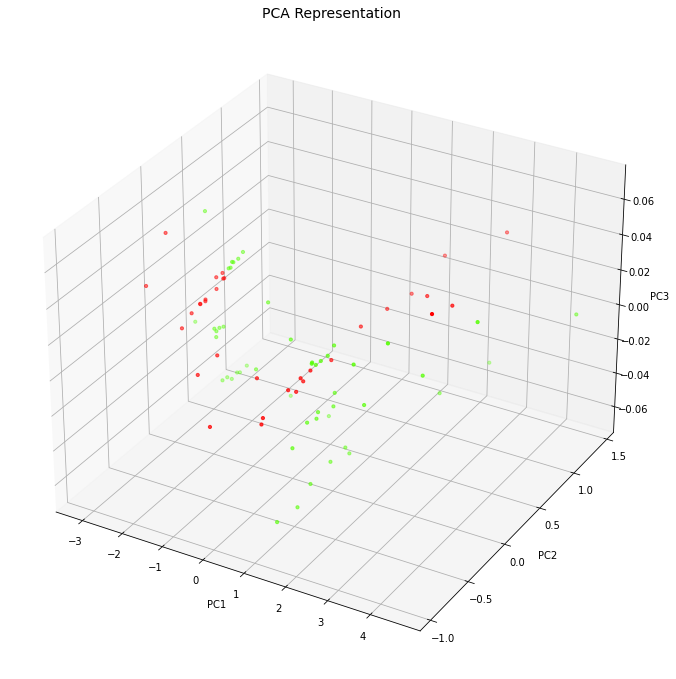

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

axes.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c=finalDf['Class Attruibute'], cmap = 'prism', s=10)

#axes.scatter(finalDfTest['principal component 1'],finalDfTest['principal component 2'],finalDfTest['principal component 3'],c=finalDfTest['Class Attruibute'], cmap = 'prism', s=10)

In [9]:
#Splitting dataset into Train and Test Sets

X = dataframeA.drop('Class Attruibute',axis=1).values
y = dataframeA['Class Attruibute'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_pca = scaler.transform(X_train)
X_test_pca = scaler.transform(X_test)


X_train_pca

X_test_pca

array([[ 0.61926421,  0.8744026 ,  0.34689035, -1.07897358, -0.57447519,
        -0.72424464],
       [ 1.26568591, -0.20081479,  0.72770659,  0.49753805, -0.07538331,
         0.51389539],
       [-0.72307164,  1.14405203,  0.8133538 , -0.58293568, -0.35941165,
        -0.76156117],
       [ 0.83949536,  1.44103054,  1.28547229, -1.07556066, -0.32853473,
        -0.78021736],
       [ 0.75394177, -0.42023152, -0.42784716,  0.48829178,  0.17462883,
         0.45925195],
       [-0.55520046,  1.11091466, -1.07068843,  0.446757  ,  0.23341443,
         0.11407127],
       [ 0.91394953, -0.116951  ,  0.44101687,  1.03494881,  1.3513735 ,
         1.10164496],
       [ 0.97183229,  0.69805373, -0.5404972 ,  0.49256077, -0.12922045,
         0.58853251],
       [ 0.26349887,  1.58998431,  0.03569349, -1.0830574 , -0.92113414,
        -0.75356504],
       [ 0.96633885, -0.52023795, -1.52925023,  0.49727396, -0.31207834,
         0.59252848],
       [-1.37568327, -1.38509904,  0.54400579,  0.

In [10]:
%%time

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_pca,y_train)

y_train_hat =logisticRegr.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('"Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

"Accuracy for our Training dataset with PCA is: 87.9310 %
CPU times: total: 0 ns
Wall time: 5 ms


In [11]:
y_test_hat=logisticRegr.predict(X_test_pca)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our Testing dataset with PCA is : {:.3f}%".format(test_accuracy) )

Accuracy for our Testing dataset with PCA is : 72.000%


In [12]:
# PCA

#pca = PCA(n_components=6)
#pca.fit(scaled_data)
#scale_data_pca = pca.transform(scaled_data)

#scale_data_pca

# split data table into data X and class labels y

#test = dataframeA.iloc[:,1:6].values
#y = dataframeA.iloc[:,7].values
#y

In [13]:
# Calculate cumulative explained variance across all PCs

#cum_exp_var = []
#var_exp = 0
#for i in pca.explained_variance_ratio_:
    #var_exp += i
    #cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

#fig, ax = plt.subplots(figsize=(8,6))
#ax.bar(range(1,7), cum_exp_var)
#ax.set_xlabel('# Principal Components')
#ax.set_ylabel('% Cumulative Variance Explained');


In [14]:
#obtain covariance matrix
#features = scaled_data.T
#cov_matrix = np.cov(features)
#cov_matrix[:10]

In [15]:
#eigendecomposition
#returns a tuple, where the first element represents eigenvalues and 
#the second one represents eigenvectors
#values, vectors = np.linalg.eig(cov_matrix)
#values[:10]

In [16]:
#vectors[:10]

In [17]:
#calculate the percentage of explained variance per principal component

#explained_variances = []
#for i in range(len(values)):
    #explained_variances.append(values[i] / np.sum(values))
 
#print(np.sum(explained_variances), '\n', explained_variances)

#first value is just the sum of explained variances and must be equal to 1
#second value is an array: 
#representing the explained variance percentage per principal component

NameError: name 'explained_variances' is not defined

In [ ]:
#projected_1 = scaled_data.dot(vectors.T[0])
#projected_2 = scaled_data.dot(vectors.T[1])
#res = pd.DataFrame(projected_1, columns=['PC1'])
#res['PC2'] = projected_2
#res['Class Attruibute'] = y
#res.head()

In [ ]:
#pca3 = PCA(n_components=3)
#principalComponents = pca3.fit_transform(scaled_data)

#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

#finalDf = pd.concat([principalDf, df[['Class Attruibute']]], axis = 1)
#finalDf

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure(figsize=(9,9))
#axes = Axes3D(fig)
#axes.set_title('PCA Representation', size=14)
#axes.set_xlabel('PC1')
#axes.set_ylabel('PC2')
#axes.set_zlabel('PC3')

#axes.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c=finalDf['Class Attruibute'], cmap = 'prism', s=10)